In [84]:
import numpy as np
import pandas as pd

import neptune
from neptune.integrations.optuna import NeptuneCallback
import optuna

from tensorflow.keras import backend, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras_tuner.tuners import RandomSearch
from keras_tuner import Objective

from sklearn.decomposition import PCA

##### Load data

In [13]:
df_boston = pd.read_csv('src/boston.csv')
df_parisHousing = pd.read_csv('src/ParisHousing.csv')

In [4]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df_parisHousing.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


##### Boston train

In [64]:
X_boston = df_boston.drop(columns=['MEDV'])
y_boston = df_boston.MEDV

In [65]:
X_boston_train, X_boston_test, y_boston_train, y_boston_test = train_test_split(X_boston, y_boston, test_size=0.2)

In [66]:
scaler_boston = StandardScaler()

X_boston_train = scaler_boston.fit_transform(X_boston_train)
X_boston_test = scaler_boston.transform(X_boston_test)

In [100]:
model_boston = Sequential()

model_boston.add(Input(shape=(13,)))
model_boston.add(Dense(16))
model_boston.add(Dense(32, activation='relu'))
model_boston.add(Dense(1))

In [101]:
model_boston.compile(loss='mae', optimizer='adam', metrics=['r2_score'])

model_boston.fit(X_boston_train, y_boston_train, batch_size=50, epochs=200)

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 21.9461 - r2_score: -6.2830  
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.5714 - r2_score: -6.0821 
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.1587 - r2_score: -5.8617 
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.7050 - r2_score: -5.6222 
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.2003 - r2_score: -5.3634 
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.6137 - r2_score: -5.0656 
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.9427 - r2_score: -4.7309 
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.1588 - r2_score: -4.3379 
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.2623 - r2_score: -3.8984 
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.2139 - r2_score: -3.4146 
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.0194 - r2_score: -2.8844 
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

In [102]:
y_boston_predict = model_boston.predict(X_boston_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [103]:
from sklearn.metrics import r2_score, mean_squared_error

mse_boston = mean_squared_error(y_boston_test, y_boston_predict)
r2_boston = r2_score(y_boston_test, y_boston_predict)
print(f'boston\nmse: {mse_boston}, r2: {r2_boston}')

boston
mse: 27.73182911462742, r2: 0.7589731197293824


##### Paris train

In [88]:
X_paris = df_parisHousing.drop(columns=['price'])
y_paris = df_parisHousing.price

In [89]:
X_paris_train, X_paris_test, y_paris_train, y_paris_test = train_test_split(X_paris, y_paris, test_size=0.2)

In [90]:
scaler_paris = StandardScaler()

X_paris_train = scaler_paris.fit_transform(X_paris_train)
X_paris_test = scaler_paris.transform(X_paris_test)

In [91]:
model_paris = Sequential()

model_paris.add(Input(shape=(16,)))
model_paris.add(Dense(16))
model_paris.add(Dense(32))
model_paris.add(Dense(1))

In [92]:
model_paris.compile(loss='mae', optimizer='adam', metrics=['r2_score'])

model_paris.fit(X_paris_train, y_paris_train, batch_size=50, epochs=100)

Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step - loss: 4992713.0000 - r2_score: -3.0369
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 4992676.0000 - r2_score: -3.0368
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 4992498.5000 - r2_score: -3.0366
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 4992070.0000 - r2_score: -3.0360
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 4991304.0000 - r2_score: -3.0350
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 4990131.0000 - r2_score: -3.0336
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 4988499.0000 - r2_score: -3.0315
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 4986354.0000 - r2_score: -3.0289
Epoch 9/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 4983658.0000 - r2_score: -3.0255
Epoch 10/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 4980374.0000 - r2_score: -3.0215
Epoch 11/100
160/160 ━━━━━━━━━━━━━━━━━━

In [93]:
y_paris_predict = model_paris.predict(X_paris_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [94]:
mae_paris = mean_absolute_error(y_paris_test, y_paris_predict)
r2_paris = r2_score(y_paris_test, y_paris_predict)
print(f'paris\nmae: {mae_paris}, r2: {r2_paris}')

paris
mae: 380100.1116085937, r2: 0.9754282884049911


##### Boston PCA

In [73]:
pca = PCA(n_components=8)
X_boston_pca = pca.fit_transform(X_boston)

In [74]:
X_boston_train_pca, X_boston_test_pca, y_boston_train, y_boston_test = train_test_split(X_boston_pca, y_boston, test_size=0.2)

In [75]:
scaler_boston_pca = StandardScaler()

X_boston_train_pca = scaler_boston_pca.fit_transform(X_boston_train_pca)
X_boston_test_pca = scaler_boston_pca.transform(X_boston_test_pca)

In [76]:
model_boston_pca = Sequential()

model_boston_pca.add(Input(shape=(8,)))
model_boston_pca.add(Dense(16))
model_boston_pca.add(Dense(64))
model_boston_pca.add(Dense(1))

In [77]:
model_boston_pca.compile(loss='mae', optimizer='adam', metrics=['r2_score'])

model_boston_pca.fit(X_boston_train_pca, y_boston_train, batch_size=50, epochs=200)

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22.1780 - r2_score: -6.0010  
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.0453 - r2_score: -5.9345 
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.9221 - r2_score: -5.8719 
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.7909 - r2_score: -5.8083 
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.6499 - r2_score: -5.7435 
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.4812 - r2_score: -5.6705 
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.2950 - r2_score: -5.5893 
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.0714 - r2_score: -5.4941 
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.7982 - r2_score: -5.3805 
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.4687 - r2_score: -5.2491 
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.0959 - r2_score: -5.0993 
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

In [78]:
y_boston_predict_pca = model_boston_pca.predict(X_boston_test_pca)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [85]:
mse_boston_pca = mean_squared_error(y_boston_test, y_boston_predict_pca)
r2_boston_pca = r2_score(y_boston_test, y_boston_predict_pca)
print(f'boston\nmse: {mse_boston_pca}, r2: {r2_boston_pca}')

boston
mse: 53.59210002700673, r2: 0.4000416777894097


##### PCA graphics

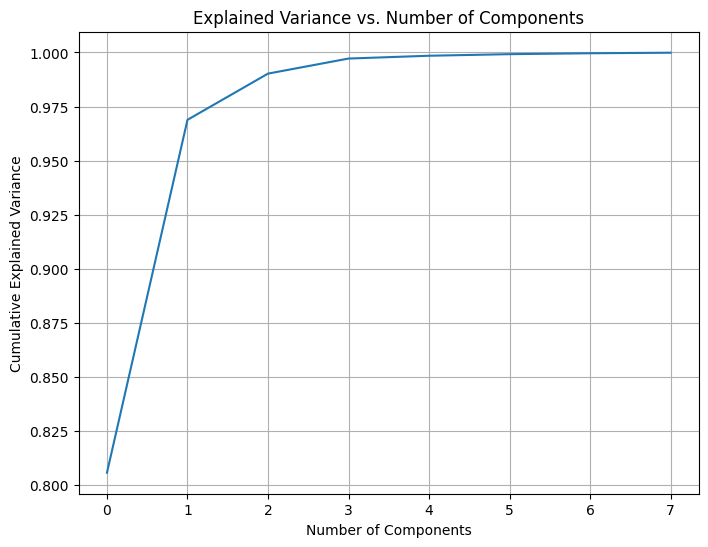

In [86]:
import matplotlib.pyplot as plt

pca_boston = PCA().fit(X_boston)

# Визуализация
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

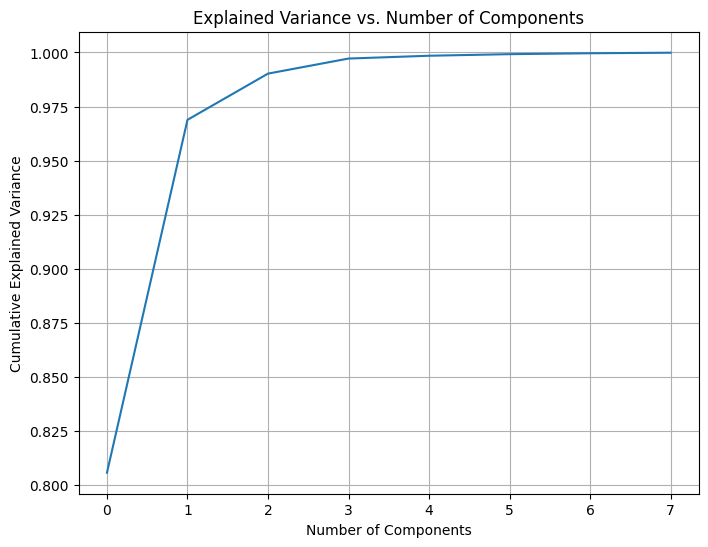

In [95]:
pca_paris = PCA().fit(X_paris)

# Визуализация
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

##### Neptune (selection of hyperparameters)

In [19]:
def r2_keras(y_true, y_pred):
    ss_res = backend.sum(backend.square(y_true - y_pred))
    ss_tot = backend.sum(backend.square(y_true - backend.mean(y_true)))
    return 1 - ss_res / (ss_tot + backend.epsilon())

In [ ]:
def create_model(n_layers, units_1, units_2, learning_rate):
    model = Sequential()
    model.add(Input(shape=(8,)))
    model.add(Dense(units_1, activation='relu'))
    if n_layers >= 2:
        model.add(Dense(units_2, activation='relu'))
    model.add(Dense(1, activation='linear'))

    optimizer = optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='mae', optimizer=optimizer, metrics=[r2_keras])
    return model

In [159]:
def objective(trial):
    
    n_layers = trial.suggest_int("n_layers", 1, 2)
    units_1 = trial.suggest_int("units_1", 8, 64)
    units_2 = trial.suggest_int("units_2", 8, 64) if n_layers >= 2 else 0
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True)
    epochs = trial.suggest_int("epochs", 100, 1000)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])

    model = create_model(n_layers, units_1, units_2, learning_rate)
    
    model.fit(
        X_boston_train_pca,
        y_boston_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=0
    )
    
    # Предсказание и оценка
    y_pred = model.predict(X_boston_test_pca, verbose=0)
    r2 = r2_score(y_boston_test, y_pred)

    return r2  

In [ ]:
from api_tokens import NEPTUNE_API_TOKEN

run = neptune.init_run(
    project="mari-e/hyperparam1",
    api_token=NEPTUNE_API_TOKEN,
)

neptune_callback = NeptuneCallback(run=run)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20, callbacks=[neptune_callback])

run["best_params"] = study.best_params
run["best_r2"] = study.best_value

run.stop()

##### Keras Tuner (selection of hyperparameters)

In [67]:
def build_model(hp):
    model = Sequential()
    
    # Количество скрытых слоёв (от 1 до 3)
    num_layers = hp.Int('num_layers', 1, 3)
    
    # Первый слой (обязательный)
    model.add(Input(shape=(13,)))
    
    # Дополнительные слои
    for i in range(1, num_layers):
        model.add(Dense(
            units=hp.Int(f'units_{i}', 8, 128, step=8),
            activation='relu'
        ))
    
    # Выходной слой
    model.add(Dense(1, activation='linear'))
    
    # Компиляция
    model.compile(
        optimizer=optimizers.Adam(
            hp.Float('learning_rate', 1e-4, 1e-1, sampling='LOG')
        ),
        loss='mae',
        metrics=[r2_keras]
    )
    
    return model

In [61]:
class MyTuner(RandomSearch):
    def run_trial(self, trial, *args, **kwargs):
        # Получаем гиперпараметры обучения
        batch_size = trial.hyperparameters.Int('batch_size', 16, 128, step=16)
        epochs = trial.hyperparameters.Int('epochs', 20, 200)
        
        # Вызываем стандартный run_trial, но с нашими batch_size и epochs
        kwargs['batch_size'] = batch_size
        kwargs['epochs'] = epochs
        return super().run_trial(trial, *args, **kwargs)

In [69]:
# Создание тюнера
tuner = MyTuner(
    build_model,
    objective=Objective('val_r2_keras', direction='max'),
    max_trials=20,
    directory='boston_tuning',
    project_name='boston_full'
)

# Поиск
tuner.search(
    X_boston_train, y_boston_train,
    validation_split=0.2,
    verbose=1
)

# Результаты
best_hps = tuner.get_best_hyperparameters(1)[0]
print("Лучшие гиперпараметры:")
for k, v in best_hps.values.items():
    print(f"  {k}: {v}")

best_model = tuner.get_best_models(1)[0]
test_r2 = best_model.evaluate(X_boston_test, y_boston_test, verbose=0)[1]
print(f"\nTest R²: {test_r2:.4f}")

Trial 20 Complete [00h 00m 19s]
val_r2_keras: -0.5093904137611389

Best val_r2_keras So Far: 0.9195135831832886
Total elapsed time: 00h 04m 25s
Лучшие гиперпараметры:
  num_layers: 3
  learning_rate: 0.01012727349182769
  batch_size: 48
  epochs: 103
  units_1: 88
  units_2: 32

Test R²: 0.8609


c:\ashes\other\courses_ml\venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
